In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy import loadtxt
from tensorflow.keras.models import load_model
import numpy as np
from tqdm import tqdm 

In [6]:
cv2_base_dir = os.path.dirname(os.path.abspath(cv2.__file__))
haar_model = os.path.join(cv2_base_dir, 'data/haarcascade_frontalface_default.xml')
face_cascade=cv2.CascadeClassifier(haar_model)

In [13]:
cwd = '/home/raghav/Pictures/Webcam/Images/'
os.mkdir(cwd)

In [14]:
def detect_face(path):
    base=os.path.basename(path)
    i = cv2.imread('/home/raghav/Pictures/Webcam/1.jpg')
    faces = face_cascade.detectMultiScale(i, 1.3, 5)
    (x,y,w,h) =faces[0]
    roi_color = i[y:y+h, x:x+w]
    img=cv2.resize(roi_color,(96,96))
    cv2.imwrite(cwd + os.path.splitext(base)[0]+ '.png',img)
    
detect_face('/home/raghav/Pictures/Webcam/1.jpg')

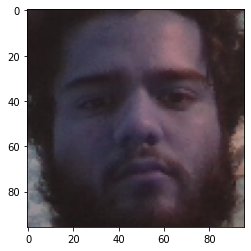

In [16]:
# i = cv2.imread('/home/raghav/Pictures/Webcam/1.jpg')
i = cv2.imread('/home/raghav/Pictures/Webcam/Images/1.png')

plt.imshow(i)

In [3]:
# Load Haarcascade
cv2_base_dir = os.path.dirname(os.path.abspath(cv2.__file__))
haar_model = os.path.join(cv2_base_dir, 'data/haarcascade_frontalface_default.xml')
face_cascade=cv2.CascadeClassifier(haar_model)

In [16]:
model=load_model('/home/raghav/Downloads/emo_model.h5')
# model summary
model.summary()

Model: "DCNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        1664      
_________________________________________________________________
batchnorm_1 (BatchNormalizat (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batchnorm_2 (BatchNormalizat (None, 48, 48, 64)        256       
_________________________________________________________________
maxpool2d_1 (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       73856  

In [19]:
roi_gray.shape

(255, 255)

In [49]:
mask={0:3,1:4,2:6}
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}


'neutral'

In [50]:
p=np.argmax(model.predict([np.array(cv2.resize(roi_gray,(48,48))).reshape(1,48,48,1)]))
emotion_label_to_text[mask[p]]

'neutral'

In [60]:
cap=cv2.VideoCapture(0)

In [64]:

while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    caption='---'
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        p=np.argmax(model.predict([np.array(cv2.resize(roi_gray,(48,48))).reshape(1,48,48,1)]))
        caption=emotion_label_to_text[mask[p]]
#         plt.imshow(x)
    cv2.putText(img,  
                caption,  
                (50, 50),  
                cv2.FONT_HERSHEY_SIMPLEX , 1,  
                (0, 255, 255),  
                2,  
                cv2.LINE_4) 
#     print(caption)
    cv2.imshow('Emotion Detection',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [55]:
cv2.destroyAllWindows()